## Learning about the datetime format & Plotting

The python `datetime` object helps to store and manipulate date and time data efficiently. It is very useful when trying to plot and work with a time-framed data set. Moreover, if a pandas dataframe column contains a date and time on string format, it can easily be converted into `datetime` objects.

In [2]:
# Importing necessary packages
from matplotlib.axes._axes import _log as matplotlib_axes_logger
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import earthpy as et

# Handles date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# plot size
plt.rcParams['figure.figsize'] = [10, 10]

# Dealing with error thrown by one of the plots
matplotlib_axes_logger.setLevel('ERROR')


# Adjust seaborn settings of font size and style
sns.set(font_scale=1.5, style="whitegrid")


In [3]:
# downloading the data 
data = et.data.get_data('colorado-flood')

In [4]:
# Set working directory
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', "data"))

In [5]:
pwd

'/home/sourav/earth-analytics/data'

In [6]:
file_path = os.path.join("colorado-flood",
                         "precipitation",
                         "805325-precip-daily-2003-2013.csv")
boulder_precip_2003_2013 = pd.read_csv(file_path)
boulder_precip_2003_2013.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,HPCP,Measurement Flag,Quality Flag
0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030101 01:00,0.0,g,
1,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030201 01:00,0.0,g,
2,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030202 19:00,0.2,,
3,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030202 22:00,0.1,,
4,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030203 02:00,0.1,,


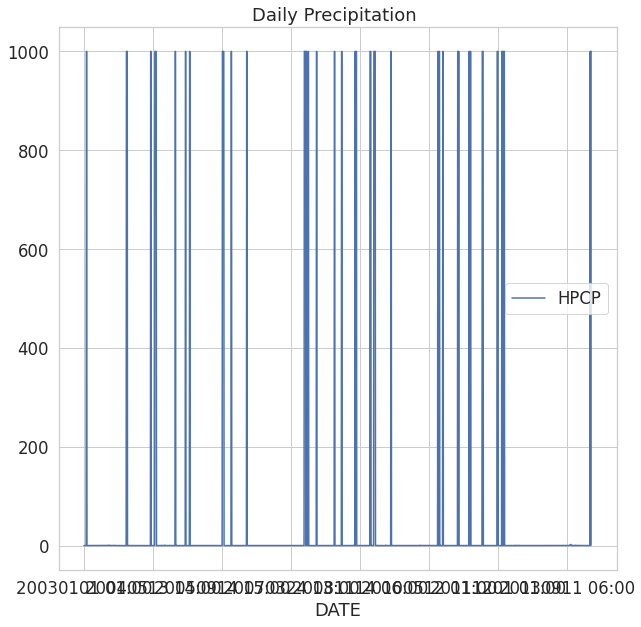

In [7]:
#plotting the data using the date and Precipitation column which will show the daily precipitation
boulder_precip_2003_2013.plot(x="DATE",
                              y="HPCP",
                              title="Daily Precipitation ")
plt.show()


## Cleaning & Exploration
The previous plot doesn't present the data perfectly. We will try to explore the data. 

In [8]:
# getting the insights of the column HPCP

boulder_precip_2003_2013["HPCP"].describe()

count    1840.000000
mean       51.192587
std       220.208147
min         0.000000
25%         0.100000
50%         0.100000
75%         0.100000
max       999.990000
Name: HPCP, dtype: float64

In [9]:
# watching the datatype of all the columns
boulder_precip_2003_2013.dtypes

STATION              object
STATION_NAME         object
ELEVATION           float64
LATITUDE            float64
LONGITUDE           float64
DATE                 object
HPCP                float64
Measurement Flag     object
Quality Flag         object
dtype: object

We can clearly see that 
1. The HPCP column contains 999.99 which is a very large number. It is assumed that this represents a no data value and need to be cleaned from the dataset.
2. Also, in the plot the x-axis values look so cluttered. If an x-axis which is a representation of a time-series data, it is often happened as a result of the datetime data not being read properly.
We will solve this using the following options with the `read_csv()` function - 
    - `parse_dates =` : Mention the columns that need to be converted into datetime object
    - `na_values=` : Values in the dataframe that needs to be replaced by NaN
    - `index_col=1`: this makes the subsetting of the data easier.

In [10]:
boulder_precip_2003_2013 = pd.read_csv(file_path,
                                       parse_dates=['DATE'],
                                       index_col=['DATE'],
                                       # Mask no data values so they are not plotted / used in analysis
                                       na_values=['999.99'])


boulder_precip_2003_2013.head()


,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2003-01-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2003-02-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2003-02-02 19:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.2,,
2003-02-02 22:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2003-02-03 02:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,


In [11]:
#examining the HPCP column
boulder_precip_2003_2013['HPCP'].describe()

count    1746.000000
mean        0.111856
std         0.093222
min         0.000000
25%         0.100000
50%         0.100000
75%         0.100000
max         2.200000
Name: HPCP, dtype: float64

We can see that the *999.99* values are removed as the max value is *2.2* now. Also, the dataframe is indexed using the DATE column.

In [12]:
boulder_precip_2003_2013.index

DatetimeIndex(['2003-01-01 01:00:00', '2003-02-01 01:00:00',
               '2003-02-02 19:00:00', '2003-02-02 22:00:00',
               '2003-02-03 02:00:00', '2003-02-05 02:00:00',
               '2003-02-05 08:00:00', '2003-02-06 00:00:00',
               '2003-02-07 12:00:00', '2003-02-10 13:00:00',
               ...
               '2013-12-01 01:00:00', '2013-12-03 20:00:00',
               '2013-12-04 03:00:00', '2013-12-04 06:00:00',
               '2013-12-04 09:00:00', '2013-12-22 01:00:00',
               '2013-12-23 00:00:00', '2013-12-23 02:00:00',
               '2013-12-29 01:00:00', '2013-12-31 00:00:00'],
              dtype='datetime64[ns]', name='DATE', length=1840, freq=None)

We can clearly see that the **DATE** column has turned into an index column now and it is of type **datetime64**

As we are done with cleaning the data we can now try plotting it.

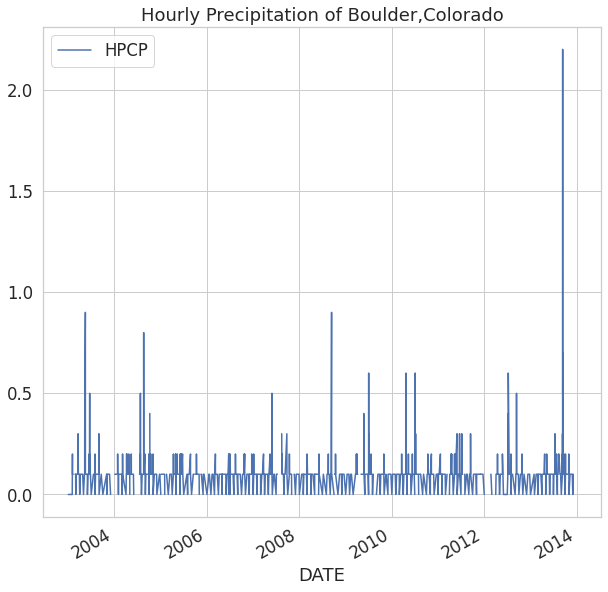

In [13]:
boulder_precip_2003_2013.plot(y="HPCP",
                              title="Hourly Precipitation of Boulder,Colorado")
plt.show()


In [14]:
# get the subset data of 2013
precip_2013 = boulder_precip_2003_2013['2013']
precip_2013.head()


,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2013-01-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.0,g,
2013-01-28 16:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.1,,
2013-01-29 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.1,,
2013-02-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.0,g,
2013-02-14 16:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.1,,


In [15]:
# removing missing data-values
precip_2013_clean = precip_2013.dropna()

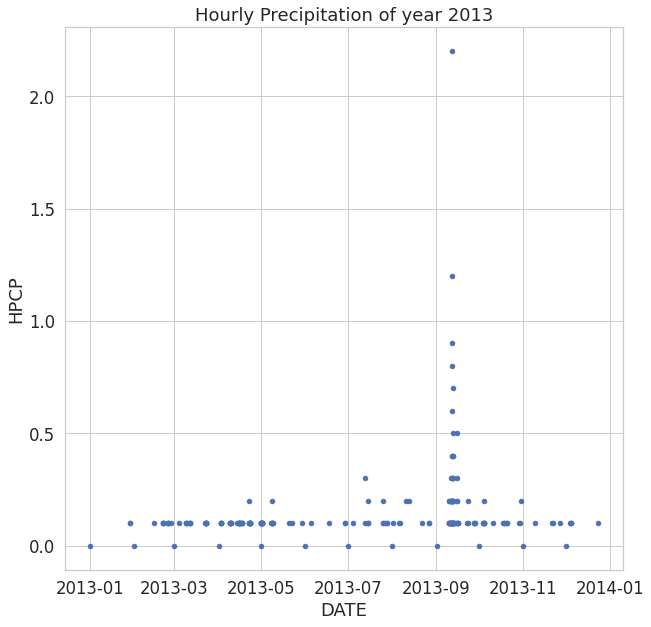

In [16]:
precip_2013_clean.reset_index().plot(x="DATE",
                                     y="HPCP",
                                     title="Hourly Precipitation of year 2013",
                                     kind="scatter")
plt.show()

### Trying resampling the data and another method of constructing a plot
Resampling the dataset means summarizing the data over different time periods. I want to resample the data using `resample()` that is available on pandas dataframe. Pandas has written the description of `resample()` method like below -

-------------------------------------------------------------
Convenience method for frequency conversion and resampling of time series. Object must have a datetime-like index (DatetimeIndex, PeriodIndex, or TimedeltaIndex), or pass datetime-like values to the on or level keyword.

-------------------------------------------------------------
I am using ("D") for resampling the dataset daily wise, then I applied `sum()` so that for every day it calculates the sum of all precipitation record.

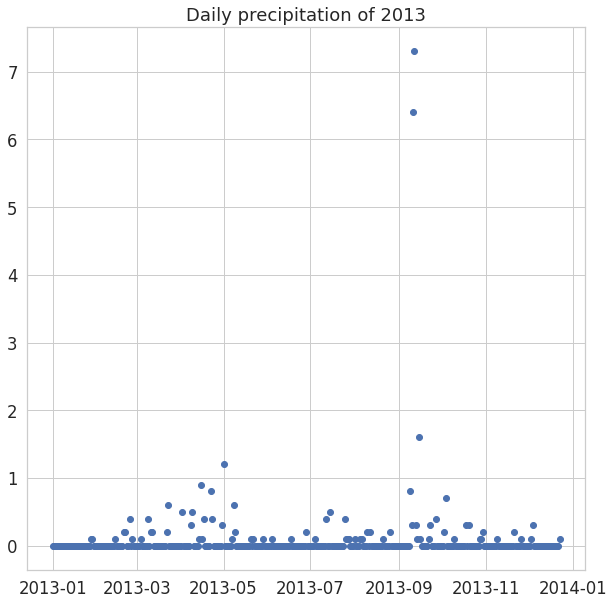

In [21]:
precip_2013_daily = precip_2013_clean.resample("D").sum()

#another way of plotting using the native matplotlib
f,ax = plt.subplots()
sc = ax.scatter(x=precip_2013_daily.index.values,
          y= precip_2013_daily["HPCP"])
ax.title.set_text("Daily precipitation of 2013")
plt.show()


### Sub plots and y-lim
I want to see compare the precipation of 2013 with values from other years. That's why I am plotting the data of year 2013 and 2012 in 2 subplots of one figure and imposing a limit of 2.0 on their y-axis labels; so that I can notice the difference visually.

In [ ]:
precip_2012 = boulder_precip_2003_2013['2012']
precip_2012_clean = precip_2012.dropna()

#another way of plotting using the native matplotlib
f,(ax1,ax2) = plt.subplots(2,1)
sc1 = ax1.scatter(x=precip_2013_clean.index.values,
                  y= precip_2013_clean["HPCP"],
                 c= precip_2013_clean["HPCP"])
sc2 = ax2.scatter(x=precip_2012_clean.index.values,
                 y= precip_2012_clean["HPCP"],
                 c = precip_2012_clean["HPCP"])


ax1.set(ylim=[0,2.0]) # two different way to set ylim of a subplot
ax2.set_ylim(0,2.0)
ax1.title.set_text("2013 Hourly precipitation Data")
ax2.title.set_text("2012 Hourly precipitation Data")

plt.show()
